by 

### Bernardo Vimpi

May 2020


#### TIME SERIES ANALYSIS

This project uses Time Series analysis of for the airpassenger dataset. It aims at applying some statistical techniques and forecast models to evaluate the features that influnce the rate at which passengers use air transportation over time.

#### Import Libraries

In [223]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib.pylab import rcParams
rcParams ['figure.figsize'] = 15,6
from statsmodels.tsa.stattools import adfuller
import pandas.core as pdc

### DATA IMPORT

In [224]:
data= pd.read_csv('AirPassengers.csv')
data.head(10)# displyaing only the top ten

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
5,1949-06,135
6,1949-07,148
7,1949-08,148
8,1949-09,136
9,1949-10,119


#### DATA CONVERSION

In [225]:
# lets convert the Months object into datetime
data['Month'] =pd.to_datetime(data.Month)
data = data.set_index(data.Month)
data.drop('Month', axis =1, inplace=True)
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [226]:
ts= data['#Passengers']
ts.head()

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

In [227]:
ts['1950']

Month
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
1950-08-01    170
1950-09-01    158
1950-10-01    133
1950-11-01    114
1950-12-01    140
Name: #Passengers, dtype: int64

#### STATIONARY TIME SERIES

A dataset is considered to have a Stationary Time Series if its statistical properties ( mean, variance) remain constant over time and an autocovariance that does not depend on time.

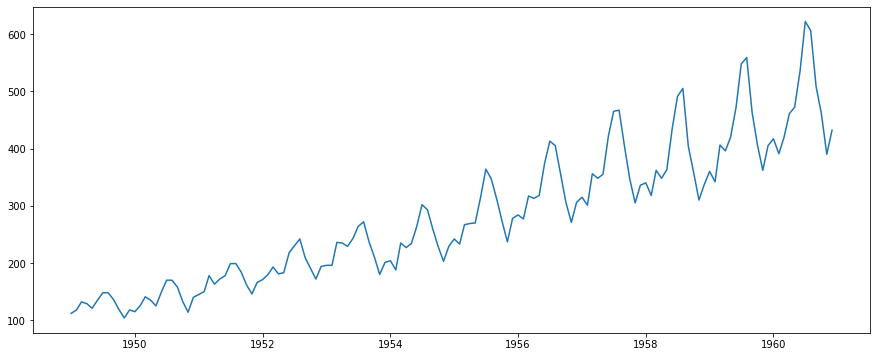

In [228]:
rcParams['figure.figsize']= 15, 6
plt.plot(ts)

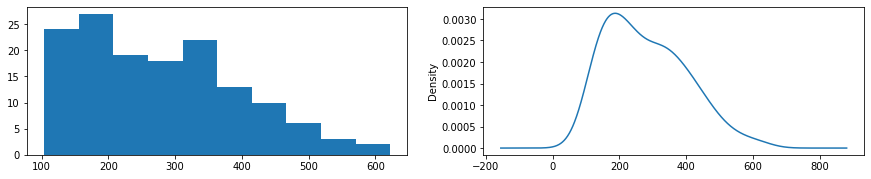

In [229]:
plt.subplot(221)
plt.hist(ts)
plt.subplot(222)
ts.plot(kind = 'kde')

In this project, we'll be using the rolling statistics plots along with Dickey-Fuller test results and the function that will take a TS as input has been defined. In order to keep the units oe measurement similar in this analysis, we decided to use and plot the standard deviation instead of variance.

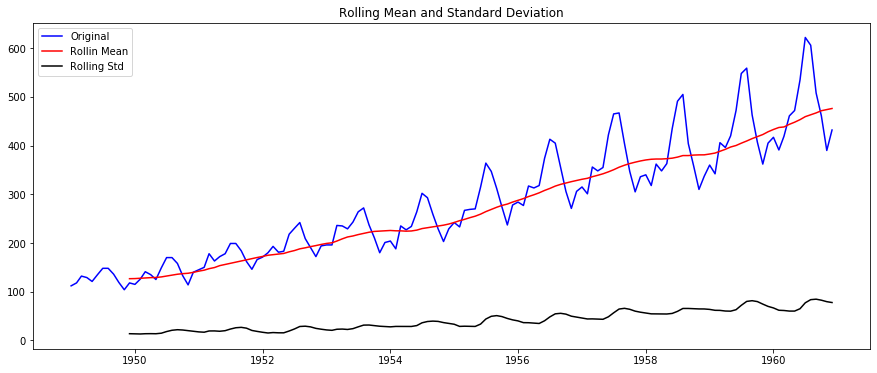

Results of Dickey-Fuller Tes:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Obersvations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [230]:
def test_stationarity(timeseries):
    rolmean = timeseries.rolling(window =12).mean()
    rolstd =timeseries.rolling(window = 12).std()
    
    orig = plt.plot(timeseries, color = 'blue', label = 'Original')
    mean = plt.plot(rolmean, color = 'red', label = 'Rollin Mean')
    st =plt.plot(rolstd, color = 'black', label = 'Rolling Std')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show()
    
    print('Results of Dickey-Fuller Tes:')
    dftest= adfuller(timeseries)
    dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic', 'p-value', '#Lags Used', 'Number of Obersvations Used'])
    
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' %key] =value
    
    print(dfoutput)

test_stationarity(ts)
    

From the results above, we can see that the standard deviation has very less variation. On the other side, the mean increases continously. Therefore, we can concluse that it is not a stationary series. Additionally, the test statistic is higher that the critical values( when compared to signed values and not absolute values).

### Stationary Time Series

It is virtually impossible to make a time series perfectly stationary. However, we can also attempt to make one and get it as close as we are able and capable to.

There are two main reasons for the non-stationarity of the Time Series:

A) Trend: varying mean over time. For exampl,e in this project we notice that on average, the number of passengers was growing over time.

B) Seasonality: variations at specific time-frames. For example, people might the propensity to buy cars during specific season or month of the year due to some added benefits such as discounts and promotions.

Nonetheless, the central premise is to model or estimate the trend and seasonality in the resies and remove those from the series to get a stationary series. Then statistical forecasting techniques can also be applied on the series. The final step woyld be to convert the forecasted values into the original scale by applying trend and seasonality constrains back.

### Trend: Estimation and Elimination

It is evident that there a significant positive trend. Thus, we are in a good shape to apply transformation which penalize higher values more than smaller values. Thuese can be taking a long, square root, cube root, etc. For simplicity, we can apply the log transformation process here.

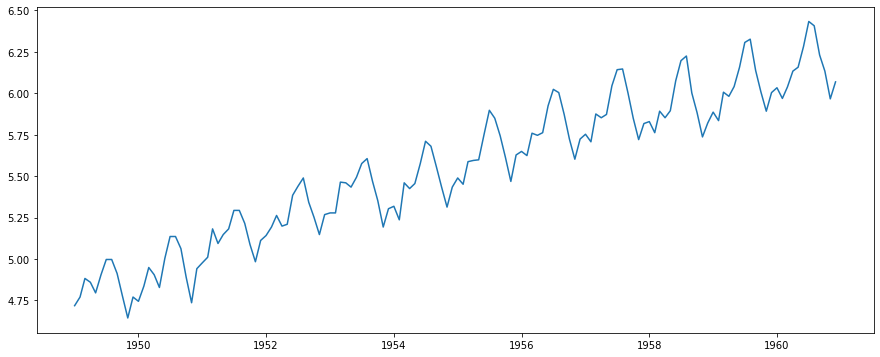

In [231]:
ts_log = np.log(ts)
plt.plot(ts_log)

We can see that data has a forward trend. However, due to the presence of noise, it is not very intuitive. Therefore we runa other techniques to estimate or mode this trend and then remove it from the series. There are many ways of doing this:

(a) Aggregation- by taking the average for a time period such as monthly or weekly averages.

(b) Smoothing - by using rolling averages

(c) Polynomial Fitting - to fit a regression model

For this project we'll employ the second technique which is Smoothing.

### SMOOTHING: ROLLING AVERAGE

In Smoothing or rolling average, we take the average of 'k' consecutive values depending on the frequency o time series. In our project, we'll take the average of the last 1 year, which corresponds to the last twelve values. 

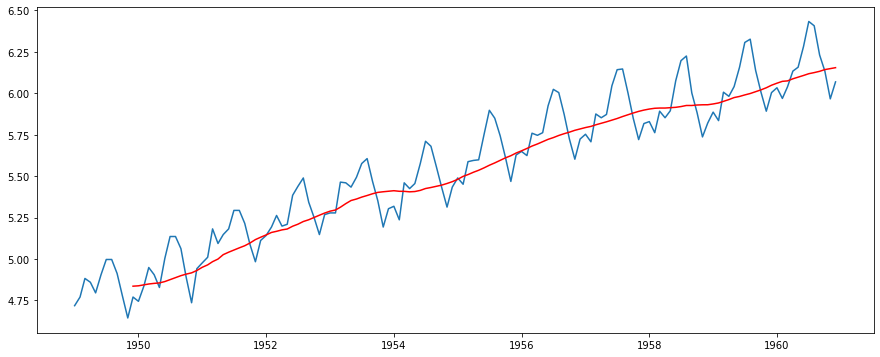

In [232]:
moving_avg = ts_log.rolling(12).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color ='red')

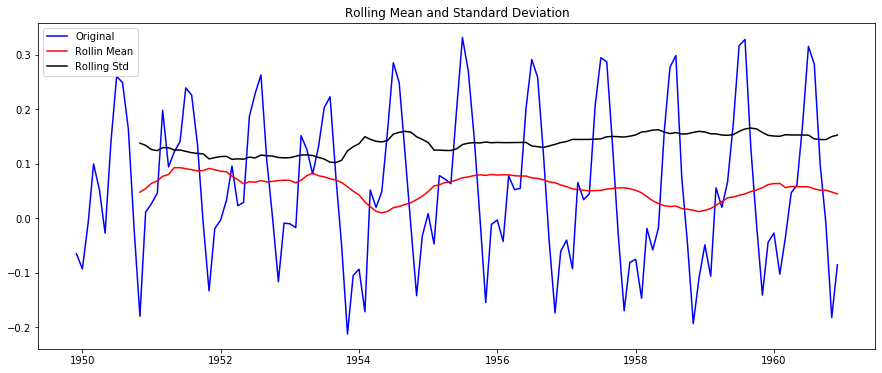

Results of Dickey-Fuller Tes:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Obersvations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [233]:
ts_log_moving_avg_diff =ts_log - moving_avg
ts_log_moving_avg_diff.dropna(inplace =True)
test_stationarity(ts_log_moving_avg_diff)

The rolling values appear vary with no consistent trend. Furthermore,the test statistic is smaller than the 5% critical values. Therefore, we can state with 95% confidence that this is a stationary series. However, downside of this analysis is the fact that the time-period has to be defined.  For this purpose, we take the yearly averages. However, this may not apply in more complex sistuations such as forecasting the price of stock. Thus, we take the weighted moving average.

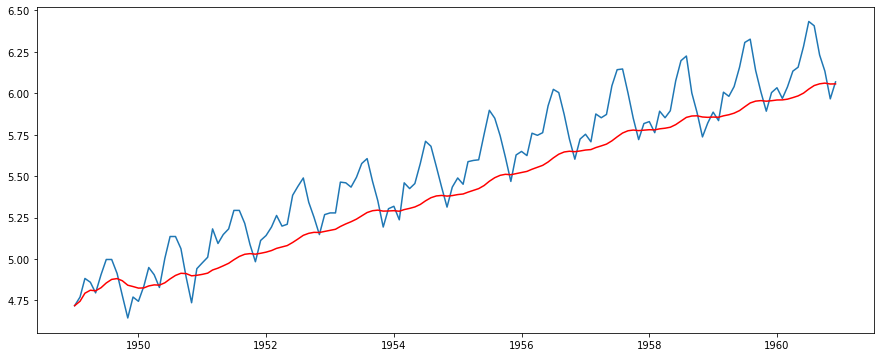

In [234]:
exp_weighted_avg = ts_log.ewm(halflife = 12).mean()
plt.plot(ts_log)
plt.plot(exp_weighted_avg, color = 'red')

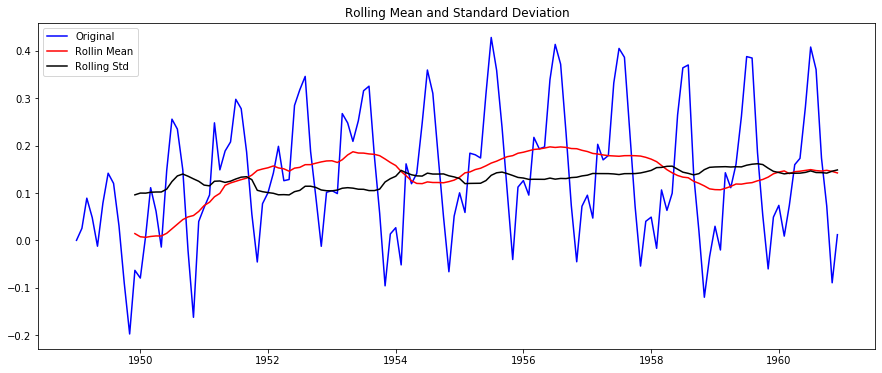

Results of Dickey-Fuller Tes:
Test Statistic                  -3.601262
p-value                          0.005737
#Lags Used                      13.000000
Number of Obersvations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [235]:
ts_log_ema_diff = ts_log - exp_weighted_avg
test_stationarity(ts_log_ema_diff)

This time series has lesser variation in mean and standard deviation. Also, the test statistic is small than the 1% critical value, which is better than the previous case.

### TREND AND SEASONALITY: ELIMINATION

There are two ways we can go about eliminating trend and seasonality: 

A) Differencing which entails taking the difference with a particular time lag

B) Decomposition which entails modeling both trend and seasonality and removing them from the model



#### Differencing

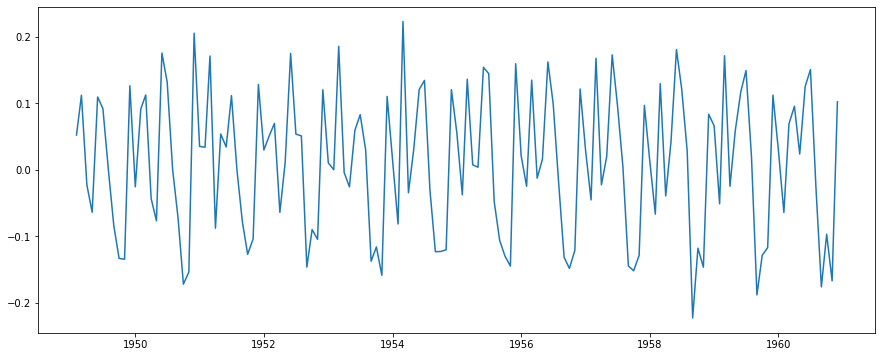

In [236]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

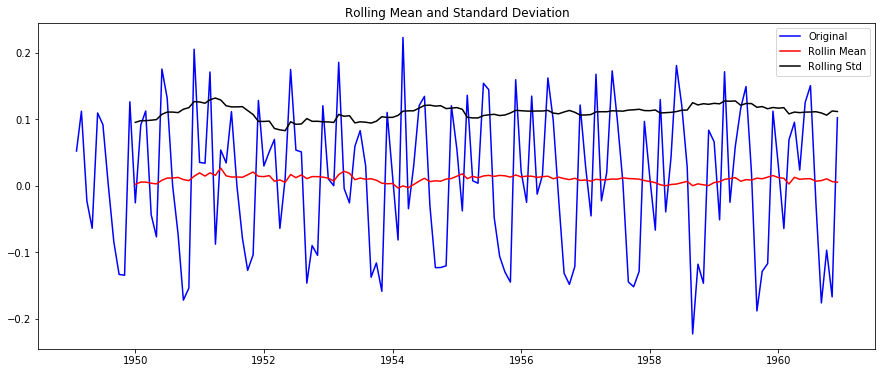

Results of Dickey-Fuller Tes:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Obersvations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [237]:
ts_log_diff.dropna(inplace =True)
test_stationarity(ts_log_diff)

As time progresses, both the standard deviation and the mean have small variations. We also notice that the t-statistics is below the 10% critical value. Therefore we have 90% confidence that the time series is stationary.

#### Decomposing

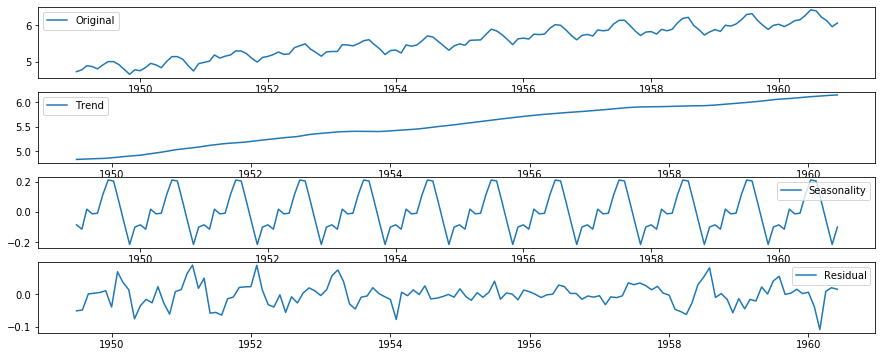

In [238]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label = 'Original')
plt.legend(loc = 'best')
plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')
plt.subplot(413)
plt.plot(seasonal, label = 'Seasonality')
plt.legend(loc = 'best')
plt.subplot(414)
plt.plot(residual, label = 'Residual')
plt.legend(loc = 'best')

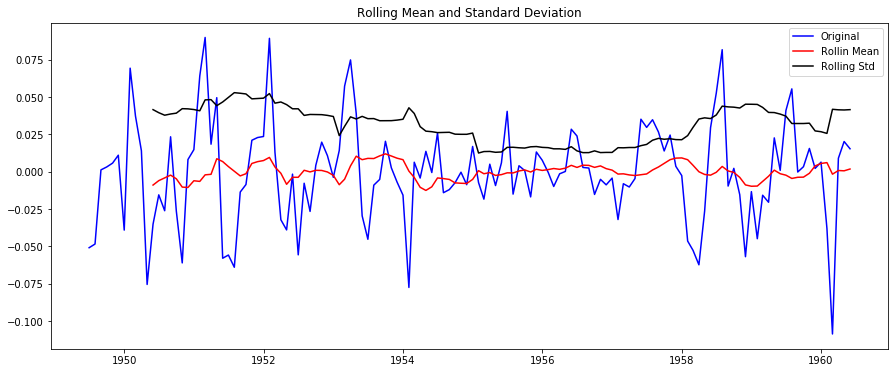

Results of Dickey-Fuller Tes:
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Obersvations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


In [239]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace = True)
test_stationarity(ts_log_decompose)

The results show that the t-statistics is lower than the 1% critical value. Therefore, this time series is almost stationary. 

 ### TIME SERIES & FORECASTING

We can create model for the time series. In the predicted residuals we can also incorporate noise and seasonality. After performing the trend and seasonality estimation, we can have two situations:

A) a stationary series with no dependence among the values. This is the easy situation to model the residuals.

B) a series with high dependence among the values. This requires us to use some statistical models such as ARIMA in order for us to forecast the data. To expand on that, the ARIMA forecasting in the time series is a linear similar to linear regression, where the predictors will depend on the specified parameters (p,d,q) of the ARIMA model. Lets describe each of the elements of the ARIMA model:

B.1) Number of Auto-Regressive (AR) term(p): the AR terms refer to the lags of the dependent variables. For example, if p is 5, the predictors for x(t) will be x(t-1)....x(t-5).

B.2) Number of Moving Average( MA) term (q): The Moving Average terms are the lagged forecast errors in prediction equation. For example, if q is 5, the predictors for x(t) will be e(t-1)...e(t-5) where e(i) is the difference between the MA at the ith instant and actual value.

B.3) Number of Differences (d): these refers to the number of nonseasonal differences. For this project, we took the first order difference. We have two other options here: a) we can pass that variable and put d-0 or, b) we can pass the original variable and put d=1. Regardless of we approach we select, the expected result will be the same. 


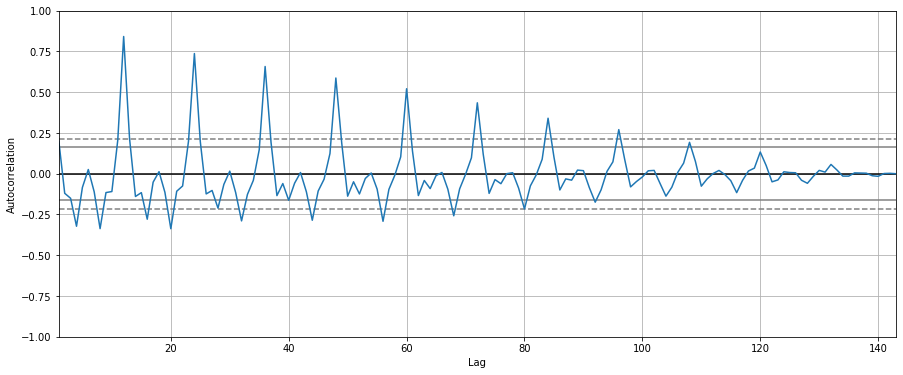

In [240]:
pd.plotting.autocorrelation_plot(ts_log_diff)

Because of seasonality, at lag 12 autocorrelation is high and for every multiple of 12, autocorrelation will be high but continue to decrease as to moves.

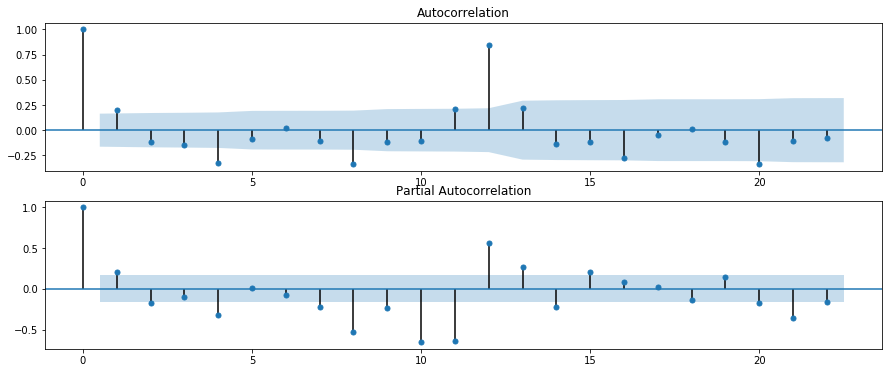

In [241]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.subplot(211)
plot_acf(ts_log_diff, ax=plt.gca())
plt.subplot(212)
plot_pacf(ts_log_diff, ax=plt.gca())
plt.show()

In [242]:
#Another method
#ACF and PACF plots
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

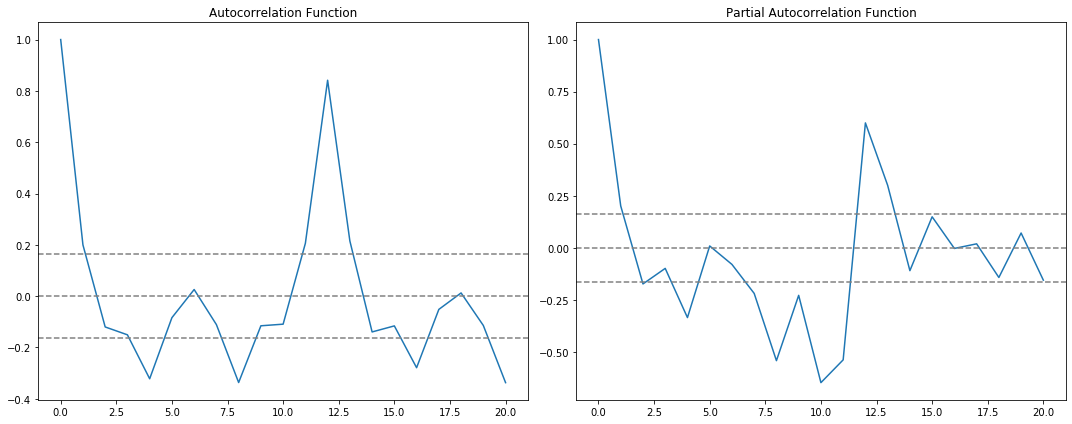

In [243]:
#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y = 0, linestyle = '--', color = 'gray') #Add a horizontal line across the axis at y = 0.
plt.axhline(y = -1.96/np.sqrt(len(ts_log_diff)), linestyle = '--', color = 'gray')
plt.axhline(y = 1.96/np.sqrt(len(ts_log_diff)), linestyle = '--', color = 'gray')
plt.title('Autocorrelation Function')



#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y = 0, linestyle = '--', color = 'gray')
plt.axhline(y = -1.96/np.sqrt(len(ts_log_diff)), linestyle='--', color = 'gray')
plt.axhline(y = 1.96/np.sqrt(len(ts_log_diff)), linestyle='--', color = 'gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout() #Automatically adjust subplot parameters to give specified padding.

In this plot, the confident intervals are represented by the two dotted lines on either sides of 0. These can be used to determine the ‘p’ and ‘q’ values as:

p – The lag value where the PACF chart crosses the upper confidence interval for the first time (p=2).

q – The lag value where the ACF chart crosses the upper confidence interval for the first time(q=2).

Now, lets make 3 different ARIMA models considering individual as well as combined effects. We will also print the RSS for each. Please note that here RSS is for the values of residuals and not actual series.

Lets work on the ARIMA model to start with

In [244]:
from statsmodels.tsa.arima_model import ARIMA, ARMAResults

### AR MODEL

Text(0.5, 1.0, 'RSS: 1.5023')

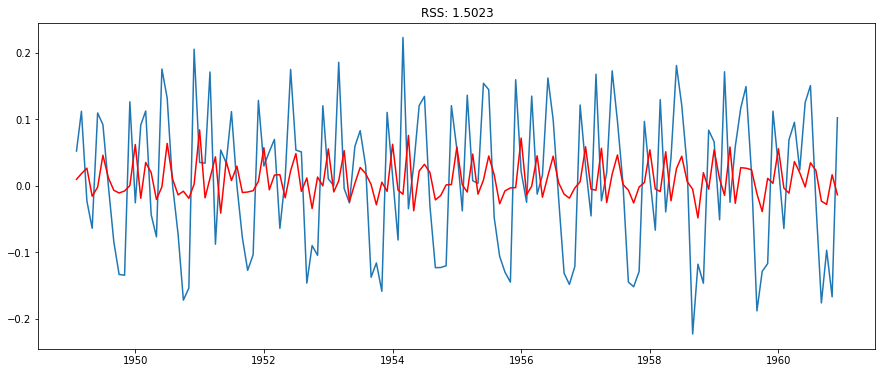

In [245]:
model = ARIMA(ts_log, order = (2,1,0))
results_AR = model.fit(disp = -1)
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color = 'red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues - ts_log_diff) ** 2))

### MA MODEL

Text(0.5, 1.0, 'RSS: 1.4721')

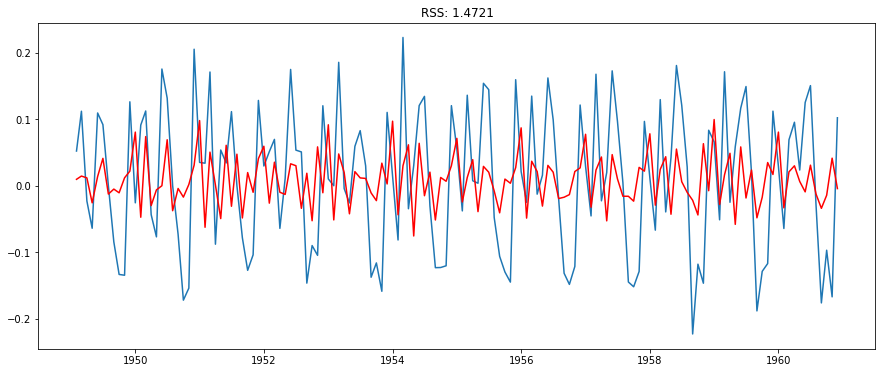

In [246]:
model = ARIMA(ts_log, order= (0, 1, 2))  
results_MA = model.fit(disp = -1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color= 'red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues - ts_log_diff)**2))

### COMBINE MODEL

Text(0.5, 1.0, 'RSS: 1.0292')

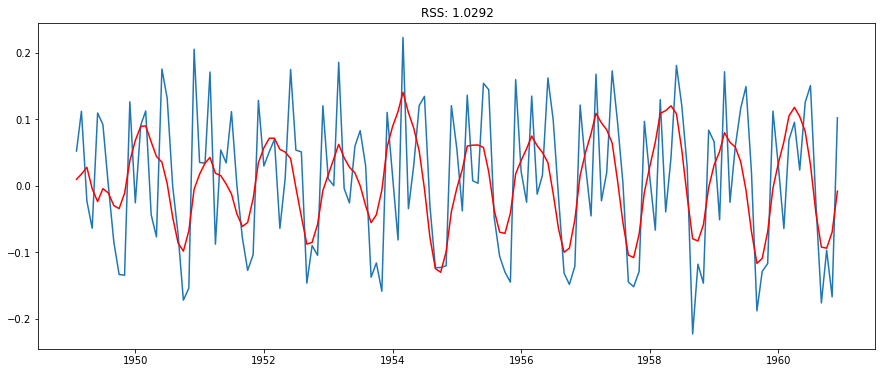

In [247]:
model = ARIMA(ts_log, order = (2, 1, 2))  
results_ARIMA = model.fit(disp = -1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color= 'red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues - ts_log_diff)**2))

Both the AR and MA models have almost the same residual sum of squares. However the combined model is relatively better.

### Using the original scale

In [248]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff.head()

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64

In [249]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.head()

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64

In [250]:
predictions_ARIMA_log = pd.Series(ts_log.iloc[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

Text(0.5, 1.0, 'RMSE: 90.1044')

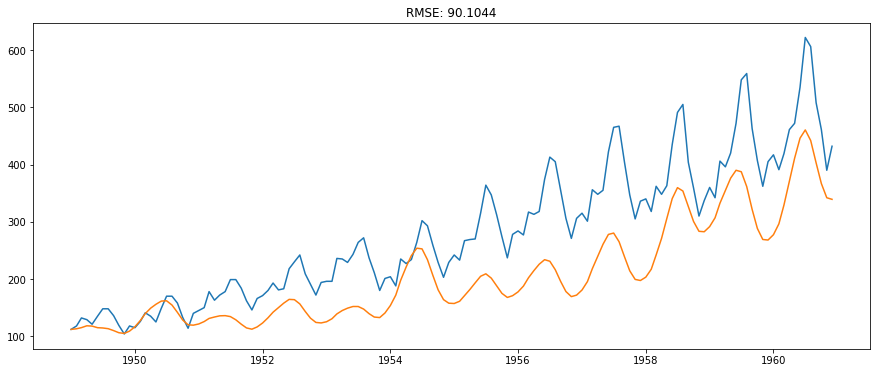

In [251]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))

Tthe root mean square is very high. Thus, this prediction is a setback and is not that much useful. 

### SARIMAX method. 

#####  Using the ARIMA TS Model to seletec the Parameters

In [258]:
import itertools
p = d = q = range(2)
pdq = list(itertools.product(p, d, q))      #Generate all different combinations of p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]       #Generate all different combinations of seasonal p, q and q triplet

To train and evaluate the ARIMA model we can use the parameters established above. This is also a process used in Machine Learning also known as model selection or grid seach.

In [259]:
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")           #Specify to ignore warning messages
AIC_df = pd.DataFrame({}, columns = ['param', 'param_seasonal', 'AIC'])

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(ts_log, order = param, seasonal_order = param_seasonal, enforce_stationarity = False, enforce_invertibility = False)
            results = mod.fit()
            #print('ARIMA{}x{}-AIC:{}'.format(param, param_seasonal, results.aic))
            temp = pd.DataFrame([[param, param_seasonal, results.aic]], columns = ['param', 'param_seasonal', 'AIC'])
            AIC_df = AIC_df.append(temp, ignore_index = True)
            del temp
        except:
            continue

### Fitting an ARIMA Time Series Model¶


In [260]:
min_aic = AIC_df.sort_values(by = 'AIC').iloc[0]    #Row with minimum AIC value
model = sm.tsa.statespace.SARIMAX(ts_log, order = min_aic.param, seasonal_order = min_aic.param_seasonal, enforce_stationarity = False, enforce_invertibility = False)
results = model.fit()
#print(results.summary())
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9419      0.039     24.105      0.000       0.865       1.019
ma.L1         -0.3804      0.093     -4.093      0.000      -0.563      -0.198
ar.S.L12       1.0200      0.003    302.398      0.000       1.013       1.027
ma.S.L12      -0.5747      0.107     -5.387      0.000      -0.784      -0.366
sigma2         0.0013      0.000      9.240      0.000       0.001       0.002


The weight ( such as importance) are the coef column. This shows how each feature impacts the time series. The P>|z| clumn tells us the significance of each feature weight. Also, each weight has a p-value lower than 0.05. It makes more sense to retain all of them in the model.

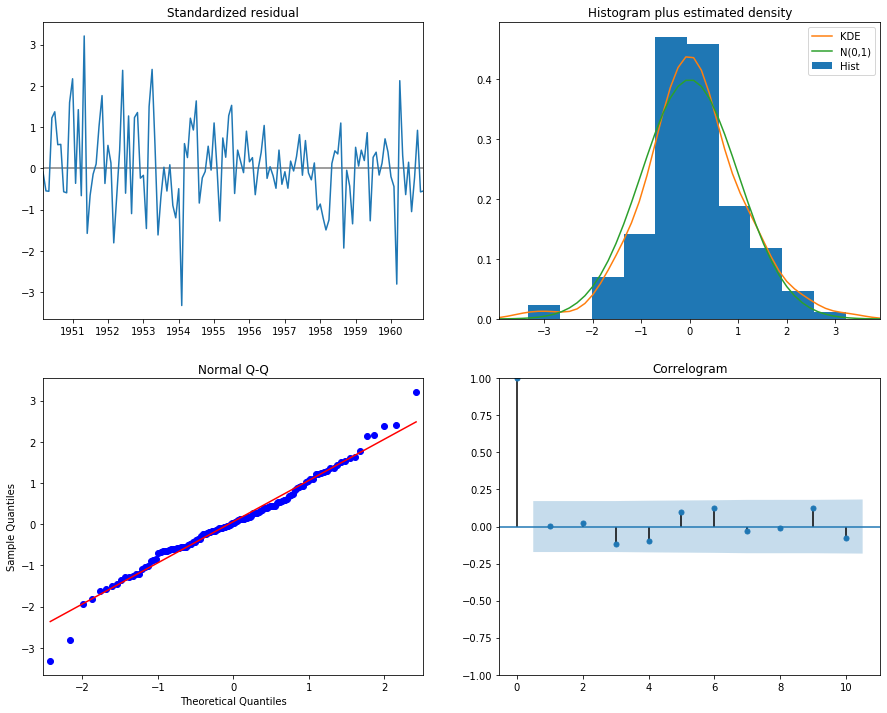

In [261]:
results.plot_diagnostics(figsize=(15, 12))    #Generate model diagnostics and investigate for any unusual behavior.
plt.show()

The main purpose here is to ensure that the residuals of the model are not correlated or normally distributed with zero-mean. However, the model here suggets that the residuals are normally distributed due to the following:

A) The top right plot, the red KDE line follows closely with the N(0,1) line (where (N(0,1) is the standard notation for a normal distribution with mean 0 and standard deviation. This is also a good indication that the residuals are normally distributed. 

B) The plot on the bottom left shows that the ordered distribution of residuals (blue dots) follows the linear trend of the samples taken from a standard normal distribution with N(0, 1). Also, this is a good indication that the residuals are normally distributed. 3.


C) For the top left plot, the residuals over time don't display any obvious seasonality and appear to be white noise. This is confirmed by the autocorrelation (i.e. correlogram) plot on the bottom right, which shows that the time series residuals have low correlation with lagged versions of itself.

### Conclusion

These observations compell us to conclude that the model prduce a good fit that can assist us to understand our time series data as well as the forecast of future values. 

### Forecasts Validation

In [262]:
#Obtain values for forecasts of the time series from 1958
pred = results.get_prediction(start = pd.to_datetime('1958-01-01'), dynamic = False)
#Obtain associated confidence intervals for forecasts of the time series
pred_ci = pred.conf_int()
pred_ci.head()

,lower #Passengers,upper #Passengers
1958-01-01,5.789096,5.931724
1958-02-01,5.734892,5.877520
1958-03-01,5.874632,6.017256
1958-04-01,5.826375,5.968999
1958-05-01,5.818793,5.961417


Important Observation: 

" dynamic = False" in the above line of code, ensures that we produce one-step ahead forecasts, meaning that forecasts at each point are generated using the full history up to that point.

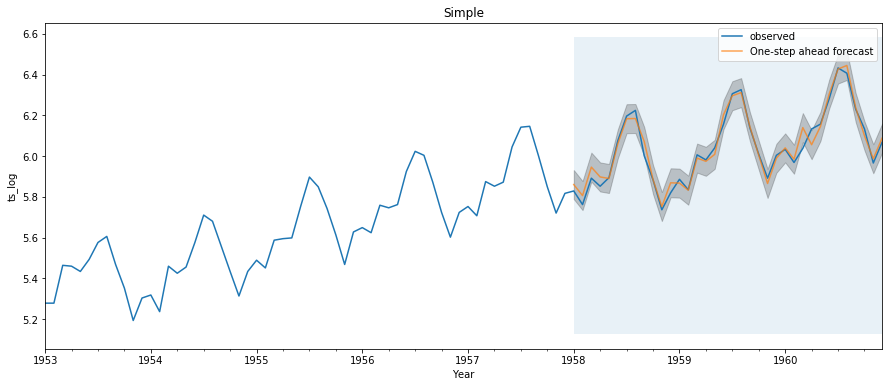

In [263]:
#Plot the forecasted values with historical data
ax = ts_log['1953':].plot(label = 'observed')
pred.predicted_mean.plot(ax = ax, label = 'One-step ahead forecast', alpha = 0.7)
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color = 'k', alpha = .2)
ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('1958-01-01'), ts_log.index[-1], alpha = .1, zorder = -1)
plt.xlabel('Year')
plt.ylabel('ts_log')
plt.title('Simple')
plt.legend()

In [264]:
pred.predicted_mean.head()

1958-01-01    5.860410
1958-02-01    5.806206
1958-03-01    5.945944
1958-04-01    5.897687
1958-05-01    5.890105
Freq: MS, dtype: float64

In [265]:
ts_log_forecasted = pred.predicted_mean     #From 1958 to 1960 (validation process)
ts_log_original = ts_log['1958-01-01':]
mse = ((ts_log_forecasted - ts_log_original) ** 2).mean()  #Mean square error
print('Mean Squared Error of forecast : {}'.format(round(mse,3)))

Mean Squared Error of forecast : 0.001


The Mean Square Error is almost zero. This suggests that our prediction is very accurate.

However, we can always use the dynamic forecast to obtain a much better representation of our true predictive power. We use information from the time series for a limited point. After that, there forecasts are created using values from prior forecasted time series points. 

In [266]:
pred_dynamic = results.get_prediction(start = pd.to_datetime('1958-01-01'), dynamic = True, full_results = True)
pred_dynamic_ci = pred_dynamic.conf_int()
pred_dynamic_ci.head()

,lower #Passengers,upper #Passengers
1958-01-01,5.789096,5.931724
1958-02-01,5.742086,5.905663
1958-03-01,5.897315,6.077449
1958-04-01,5.870390,6.064032
1958-05-01,5.878692,6.083573


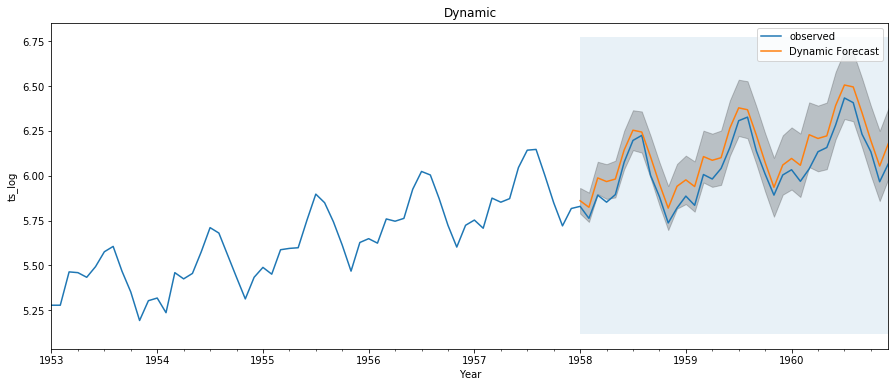

In [267]:
ax = ts_log['1953':].plot(label = 'observed')
pred_dynamic.predicted_mean.plot(ax = ax, label = 'Dynamic Forecast')
ax.fill_between(pred_dynamic_ci.index, pred_dynamic_ci.iloc[:, 0], pred_dynamic_ci.iloc[:, 1], color = 'k', alpha = .2)
ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('1958-01-01'), ts_log.index[-1], alpha = .1, zorder = -1)
plt.xlabel('Year')
plt.ylabel('ts_log')
plt.title('Dynamic')
plt.legend()

In [268]:
ts_log_forecasted_dyna = pred_dynamic.predicted_mean
ts_log_truevalue = ts_log['1958-01-01':]
mse = ((ts_log_forecasted_dyna - ts_log_truevalue) ** 2).mean()
print('Mean Squared Error of forecast : {}'.format(round(mse, 3)))

Mean Squared Error of forecast : 0.008


Here we see tyjay the predicted values generated from the dynamic forecasts gives a mean squared error of 0.008. 

#### Producing and Visualizing Forecasts

In [269]:
pred_uc = results.get_forecast(steps=100)     #Get forecast 100 steps ahead in future (ts_log)
pred_ci = pred_uc.conf_int()                  #Get confidence intervals of forecasts (ts_log)
pred_ci.head()

,lower #Passengers,upper #Passengers
1961-01-01,6.045087,6.187709
1961-02-01,5.978741,6.142312
1961-03-01,6.097809,6.277936
1961-04-01,6.119977,6.313613
1961-05-01,6.151024,6.355900


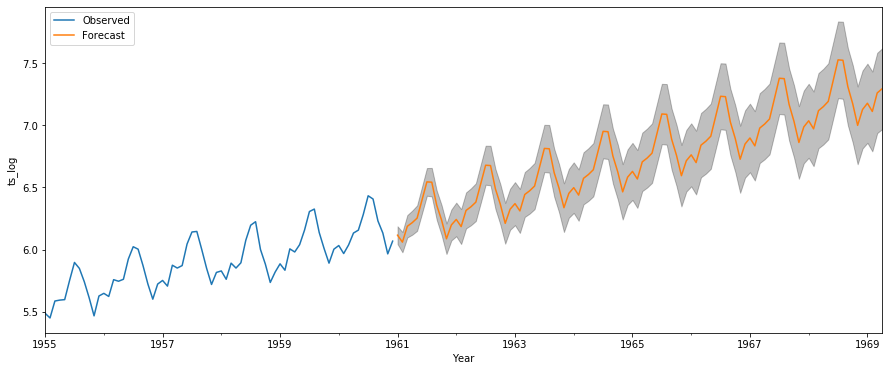

In [270]:
ax = ts_log['1955':].plot(label='Observed')
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Year')
ax.set_ylabel('ts_log')
plt.legend(loc = 'upper left')
plt.show()

### Original Data

In [271]:
#Take exponential function
pred_uc = np.exp(pred_uc.predicted_mean)
pred_ci = np.exp(pred_ci)

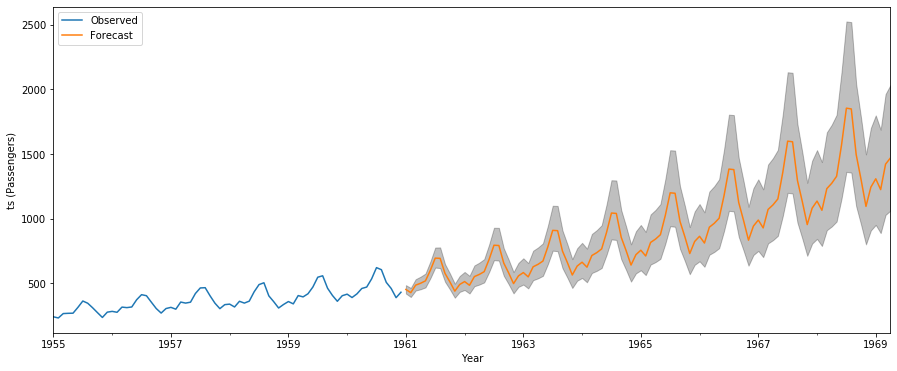

In [272]:
#Plot original data prediction
ax = ts['1955':].plot(label='Observed')
pred_uc.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Year')
ax.set_ylabel('ts (Passengers)')
plt.legend(loc = 'upper left')
plt.show()

Thank you

#### Bernardo Vimpi

May 2020